In [1]:
import linclass
import numpy as np
import matplotlib.pyplot as plt

Exercise 12: (Section 12) Perceptron training, Algorithm 12.1

In [5]:
def perceptron(α,R):

    # Initialization
    w = linclass.gen_w0(D)
    n = 0
    Fn = []

    # Iteration
    while (n < R):

        # Gradient descent step
        wnew = w
        for i in range(N):
            if np.sign(w.T @ X[:,i]) != Y[i]:
                wnew = wnew + α*Y[i]*X[:,i].reshape(D,1)

        # If the element is positive, np.sign() returns 1.
        # If the element is negative, np.sign() returns -1.
        # If the element is zero, np.sign() returns 0.

        # Save current objective function value for output
        Fn = Fn + [linclass.Fp(wnew,X,Y)]

        # Iteration
        w = wnew
        n = n + 1
    return wnew, Fn

Generate example linear classification data

In [6]:
N = 1000
D = 2
σ = 0.1
wt,X,Y = linclass.gen_data(N,D,σ)

Apply perceptron training

In [7]:
R = 100
α = 0.002
wopt, Fn = perceptron(α,R)
Fopt = Fn[-1]
print(f'Perceptron training parameter estimate: w*={wopt.T}, F*={Fopt}')

Perceptron training parameter estimate: w*=[[-0.50175874  0.20792672]], F*=0.6533923262359713


Plot training data

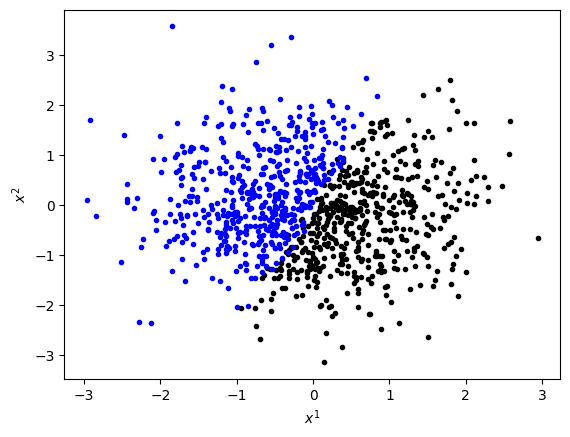

In [8]:
i = (Y==-1).reshape(N)
j = (Y==1).reshape(N)
plt.plot(X[0,i],X[1,i],'k.')
plt.plot(X[0,j],X[1,j],'b.')
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.show()

Plot perceptron loss

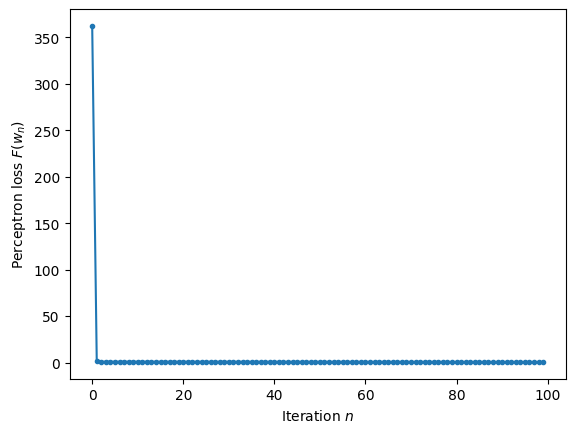

In [9]:
plt.plot(Fn,'.-')
plt.xlabel('Iteration $n$')
plt.ylabel('Perceptron loss $F(w_n)$')
plt.show()